# **Install Library**

In [14]:
import numpy as np # for numerical analyis
import pandas as pd # data analysis
import matplotlib.pyplot as plt # drawing plots
import seaborn as sns   # visualize 
import plotly # visualize 
import plotly.graph_objects as go # advance visualize 
import plotly.express as px # visualize 

# **Import dataset**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# reading the data 
df=pd.read_csv("/content/drive/MyDrive/datasets/googleplaystore.csv")
df.sample(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1940,Soul Knight,GAME,4.7,292164,59M,"10,000,000+",Free,0,Everyone 10+,Action,"August 1, 2018",1.8.4,4.1 and up
850,Blinkist - Nonfiction Books,EDUCATION,4.1,16103,13M,"1,000,000+",Free,0,Everyone,Education,"July 31, 2018",5.7.1,4.1 and up
8207,dB Sound Level Meter,TOOLS,3.9,203,2.3M,"10,000+",Free,0,Everyone,Tools,"March 3, 2017",1.08,3.0 and up
10143,EZ TV Player,VIDEO_PLAYERS,3.5,51,11M,"10,000+",Free,0,Everyone,Video Players & Editors,"June 26, 2018",8.0.9,5.0 and up
10070,S.O.L : Stone of Life EX,FAMILY,4.3,171220,42M,"5,000,000+",Free,0,Everyone 10+,Role Playing,"July 28, 2015",1.2.6,2.3.3 and up
8133,Šmelina .cz inzeráty inzerce,SHOPPING,3.9,117,9.8M,"10,000+",Free,0,Everyone,Shopping,"May 13, 2018",1.3,4.0 and up
4500,Q*bert: Rebooted,GAME,4.3,13788,55M,"1,000,000+",Free,0,Everyone,Arcade,"April 1, 2017",1.1,4.4 and up
780,Magoosh GMAT Prep & Practice,EDUCATION,4.3,1058,Varies with device,"100,000+",Free,0,Everyone,Education,"June 18, 2018",Varies with device,Varies with device


# **Data understanding**

In [17]:
df.shape

(10841, 13)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **Data cleaning**

In [19]:
# drop duplicate value
df.dropna(inplace=True)

In [20]:
# cleaning Installs column 
# remove + and comma(,) from the values 

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x) # removing +
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x) # removing ,
df['Installs'] = df['Installs'].apply(lambda x: int(x)) # converting into int 

In [21]:
# cleaing Price column 
# removing $ sign 

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x)) # converting into float 

In [22]:
# cleaing Size column

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

# **Visualization**

# 1. The number of application by category and installation count

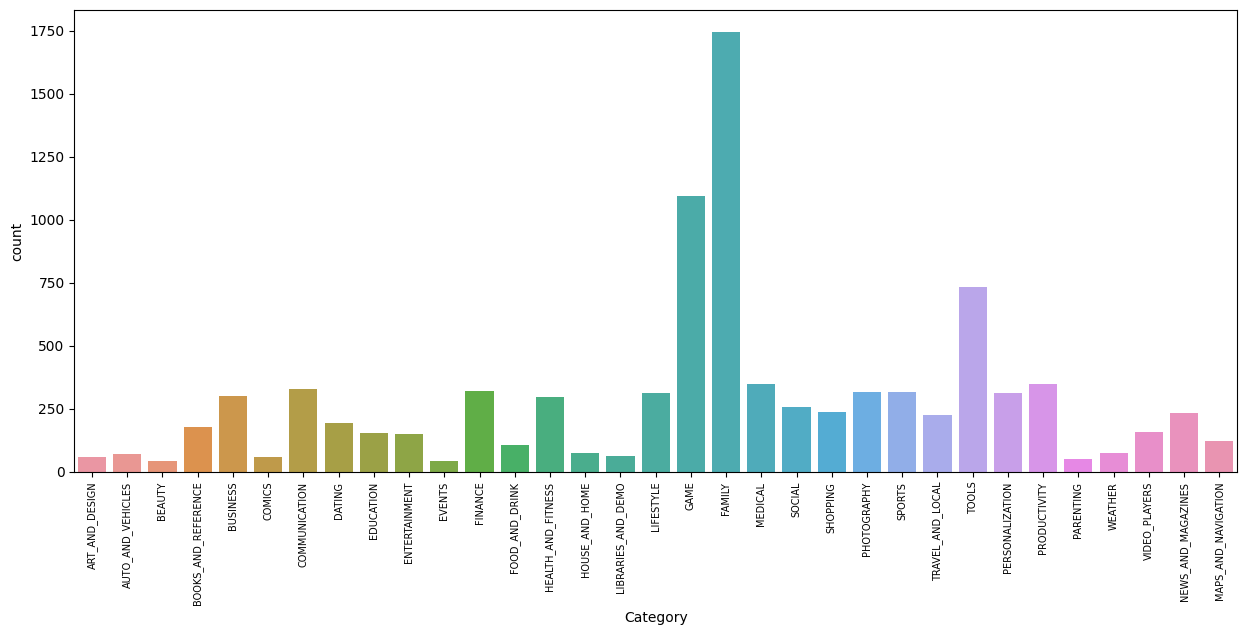

<ipython-input-23-9b4a1b873d2d>:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



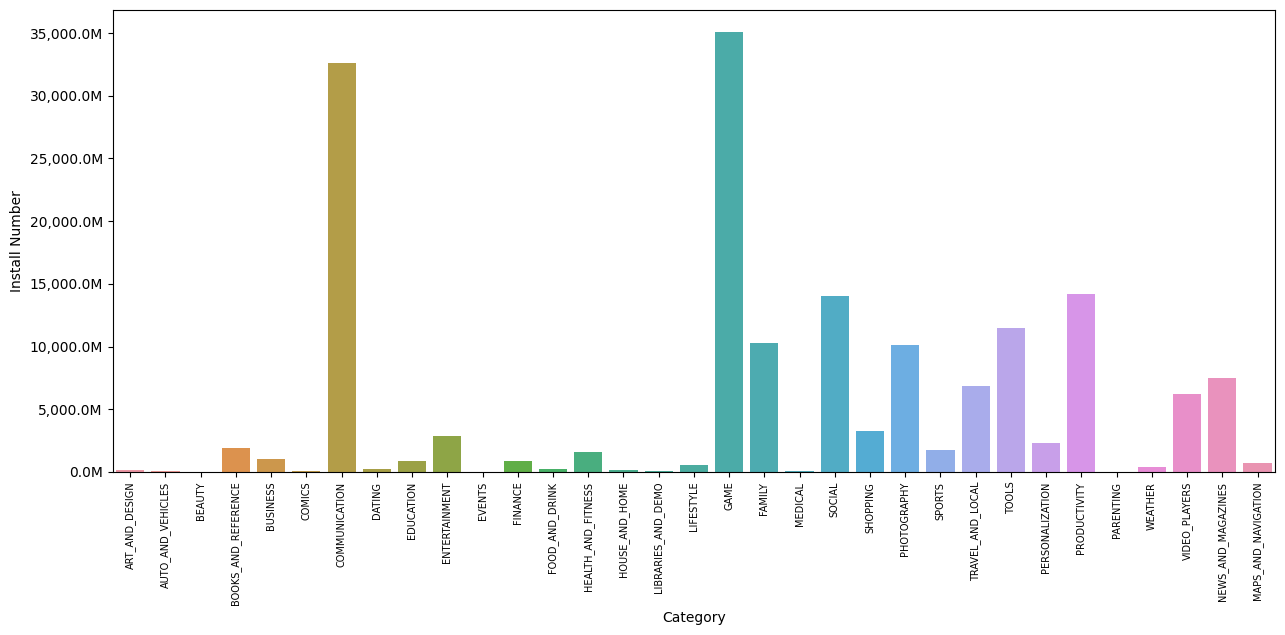

In [23]:
from pandas.tseries.frequencies import unique

# the number of app by category
plt.figure(figsize=(15,6))
fig = sns.countplot(x=df["Category"])
fig.set_xticklabels(fig.get_xticklabels(), rotation=90,fontsize=7)
plt.show()

# app installation across categories
categories = unique(df["Category"])
data = []
for cat in categories:
  data.append([cat, df.loc[df.Category == cat]["Installs"].sum()])
df2 = pd.DataFrame(data, columns=['Category', 'Install Number'])

plt.figure(figsize=(15,6))
fig = sns.barplot(data=df2, x="Category", y="Install Number")

fig.set_xticklabels(fig.get_xticklabels(), rotation=90,fontsize=7)

ylabels = ['{:,}'.format(x) + 'M' for x in fig.get_yticks()/1000000]
fig.set_yticklabels(ylabels)

plt.show()

# 2. Number of Paid application VS Free application also show the category

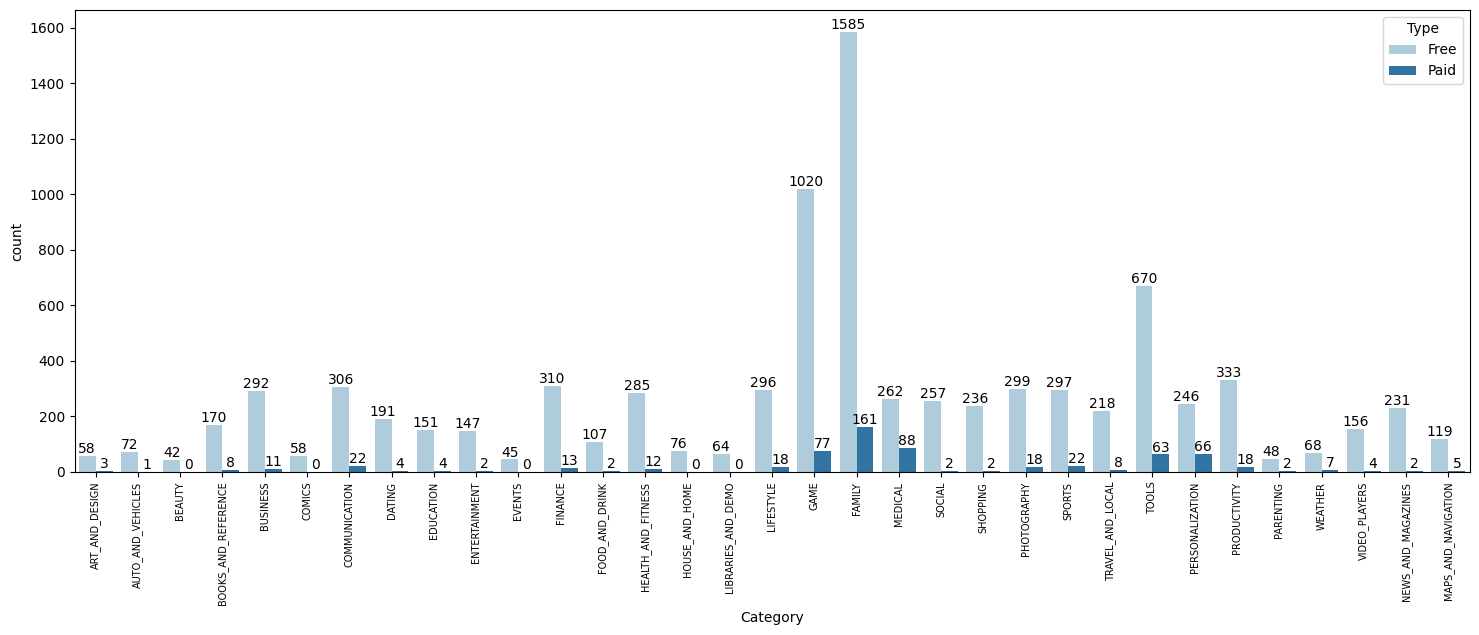

In [24]:
palette = sns.color_palette("Paired")

plt.figure(figsize=(18,6))
fig = sns.countplot(data=df, x="Category", hue="Type", palette=palette)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90,fontsize=7)
for i in fig.containers:
    fig.bar_label(i,)
plt.show()

# 3. Android version that most applications support

Android Ver
4.1 and up      2059
4.0.3 and up    1240
4.0 and up      1129
4.4 and up       875
2.3 and up       582
5.0 and up       535
4.2 and up       337
2.3.3 and up     240
3.0 and up       211
2.2 and up       208
dtype: int64


[Text(0.5, 0, 'Number of Applications'), Text(0, 0.5, 'Android Version')]

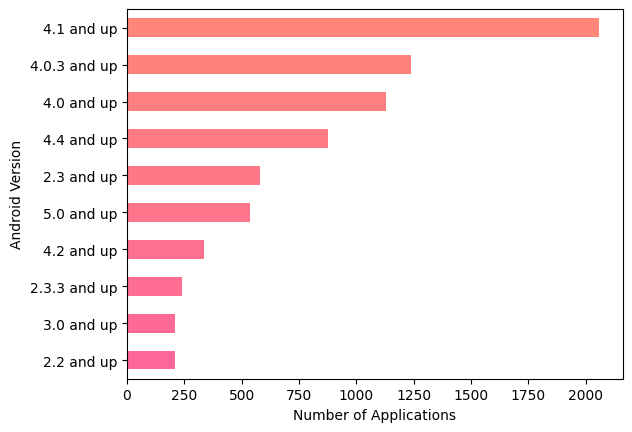

In [25]:
from matplotlib import cm

df_filtered = df[df['Android Ver'] != 'Varies with device']

gp = df_filtered.sort_values('Android Ver', ascending=True).groupby('Android Ver').size().nlargest(10)

bar_colors = cm.spring(np.linspace(.4, .8, 30))

print(gp)

gp[::-1].plot(kind = 'barh', color=bar_colors).set(xlabel="Number of Applications", ylabel="Android Version")

# 4. Free application will have higher installation than paid application?

[Text(0.5, 0, 'Types of Application'),
 Text(0, 0.5, 'Number of Installation (10 M)')]

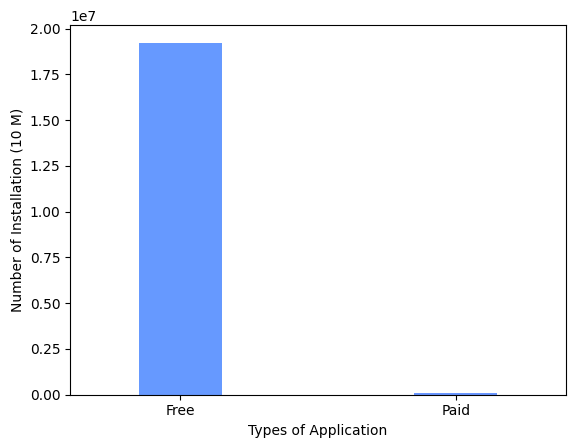

In [26]:
data = df.groupby(['Type'])['Installs'].mean()

data['Free'] = int("{:.0f}".format(float(data['Free'])))
data['Paid'] = int("{:.0f}".format(float(data['Paid'])))

bar_colors = cm.cool(np.linspace(.4, .8, 30))
data.plot(kind = "bar", rot=0, stacked=True, width=0.3, align='center', color=bar_colors).set(xlabel="Types of Application", ylabel="Number of Installation (10 M)")

In [27]:
data = df.groupby(['Type', 'Android Ver']).size()

data

Type  Android Ver       
Free  1.0 and up               2
      1.5 and up              11
      1.6 and up              68
      2.0 and up              22
      2.0.1 and up             2
      2.1 and up              92
      2.2 and up             167
      2.3 and up             519
      2.3.3 and up           211
      3.0 and up             183
      3.1 and up               8
      3.2 and up              25
      4.0 and up            1052
      4.0.3 - 7.1.1            2
      4.0.3 and up          1171
      4.1 - 7.1.1              1
      4.1 and up            1953
      4.2 and up             322
      4.3 and up             195
      4.4 and up             839
      4.4W and up              3
      5.0 - 6.0                1
      5.0 - 8.0                2
      5.0 and up             508
      5.1 and up              15
      6.0 and up              46
      7.0 - 7.1.1              1
      7.0 and up              28
      7.1 and up               3
      8.0 and up  

# 5. People spend money buying games more than other categories?

<ipython-input-28-112b123d18af>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-28-112b123d18af>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



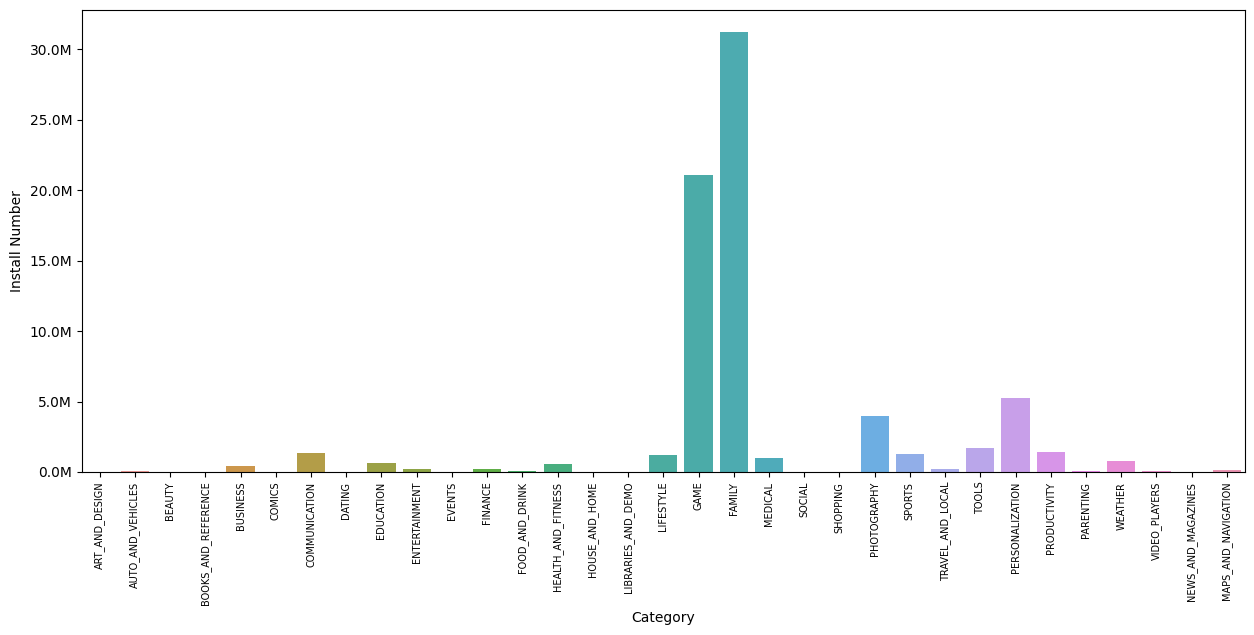

In [28]:
categories = unique(df["Category"])
data = []
for cat in categories:
  data.append([cat, df.loc[df.Type == "Paid"][df.Category == cat]["Installs"].sum()])
df2 = pd.DataFrame(data, columns=['Category', 'Install Number'])

plt.figure(figsize=(15,6))
fig = sns.barplot(data=df2, x="Category", y="Install Number")

fig.set_xticklabels(fig.get_xticklabels(), rotation=90,fontsize=7)

ylabels = ['{:}'.format(x) + 'M' for x in fig.get_yticks()/1000000]
fig.set_yticklabels(ylabels)

plt.show()

# 6. Should an app that is still updating should have high installation?

In [29]:
# reformat data function
def monthToNum(shortMonth):
    return {
            'January': '01',
            'February': '02',
            'March': '03',
            'April': '04',
            'May': '05',
            'June': '06',
            'July': '07',
            'August': '08',
            'September': '09', 
            'October': '10',
            'November': '11',
            'December': '12'
    }[shortMonth]

def reformat(x):
  if ', ' not in x: return 'null'
  s = x.split(', ')
  v = s[0].split(' ')
  month = monthToNum(v[0])
  # JS condition ? ans1 : ans2
  # PY ans1 condition else ans2
  day = '0'+v[1] if len(v[1]) == 1 else v[1]
  year = s[1].strip()
  return str(year + month + day)

# Map last update to datetime format
newDf = df
newDf['Last Updated'] = newDf['Last Updated'].map(lambda x: reformat(x))
newDf = newDf[newDf['Last Updated'] != 'null']
newDf['DateTime'] = newDf['Last Updated'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

# Sort data using last update
newDf.sort_values(by='Last Updated', ascending=True)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,DateTime
7479,FML F*ck my life + widget,FAMILY,4.2,1415,0.209,100000.0,Free,0.00,Everyone,Entertainment,20100521,3.1,1.5 and up,2010-05-21
7430,CJ Poker Odds Calculator,GAME,4.1,207,0.116,50000.0,Free,0.00,Everyone,Card,20110130,1.2,1.6 and up,2011-01-30
10282,FD Shift Calendar Widget,TOOLS,4.1,981,0.073,100000.0,Free,0.00,Everyone,Tools,20110316,1.2.4,1.6 and up,2011-03-16
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.100,5000000.0,Free,0.00,Everyone 10+,Action,20110411,1.4.3,2.0 and up,2011-04-11
8084,Freecell CY,GAME,4.0,387,1.100,50000.0,Free,0.00,Everyone,Card,20110416,1.3.3,1.6 and up,2011-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10712,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,NaN,1000000.0,Free,0.00,Everyone,Shopping,20180808,Varies with device,Varies with device,2018-08-08
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27.000,50000000.0,Free,0.00,Teen,Action,20180808,1.1.2,4.1 and up,2018-08-08
10209,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.600,50000.0,Free,0.00,Everyone,Tools,20180808,1.1.9,4.0.3 and up,2018-08-08
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.400,1000.0,Paid,7.99,Everyone,Health & Fitness,20180808,1.9.3,4.2 and up,2018-08-08


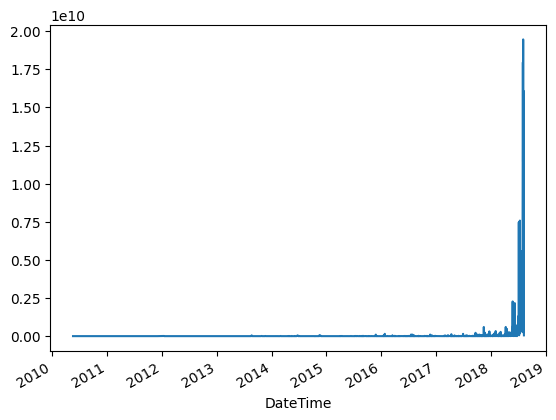

In [30]:
# no filter
data = newDf.groupby('DateTime')['Installs'].sum()
lines = data.plot.line(x='DateTime')

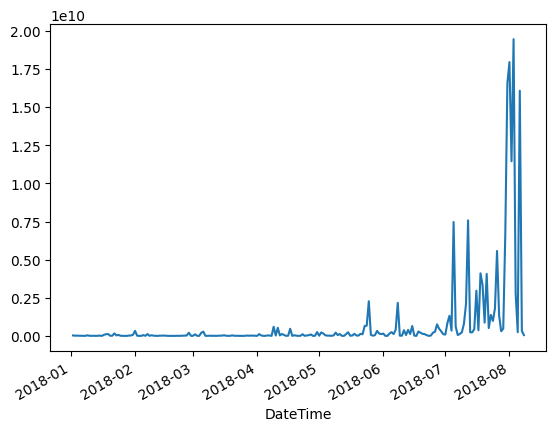

In [31]:
# filter later than 2018
newDf = newDf[(newDf['DateTime'] > '2018-01-01')]
data = newDf.groupby('DateTime')['Installs'].sum()
lines = data.plot.line(x='DateTime')

# 7. Does the size of the application affect the number of installations?

In [32]:
# Sort data using size of application to show top 10% candidate of both ascending and descending
asc_sorted_data = df.sort_values(by='Size').head(round(df.shape[0]*0.1))
des_sorted_data = df.sort_values(by='Size', ascending=False).head(round(df.shape[0]*0.1))

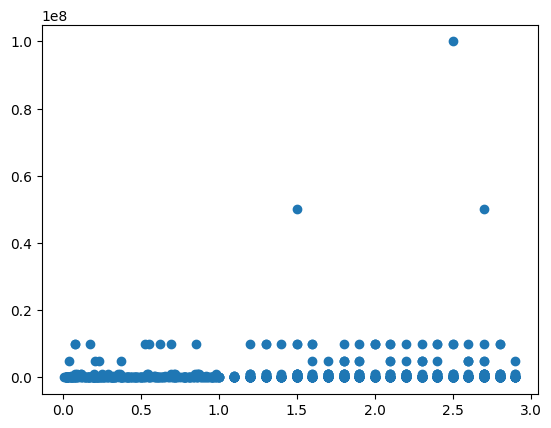

In [33]:
fig, ax = plt.subplots()
ax.scatter(asc_sorted_data["Size"], asc_sorted_data["Installs"])

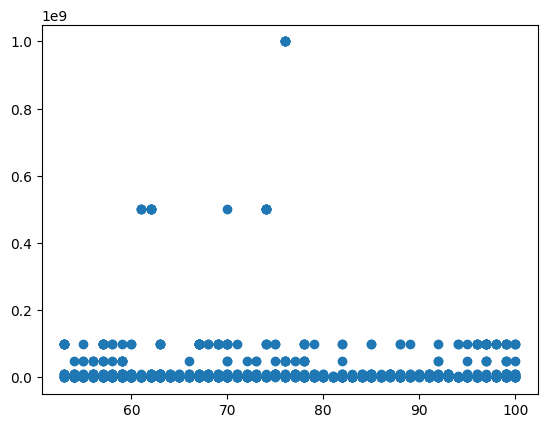

In [34]:
fig, ax = plt.subplots()
ax.scatter(des_sorted_data["Size"], des_sorted_data["Installs"])

In [35]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,20180107,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,20180115,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,20180801,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,20180608,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20180620,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,20170618,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,20170725,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,20180706,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,20150119,Varies with device,Varies with device


In [36]:
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()